In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
full_data = pd.read_csv('~/Downloads/shot_logs.csv')

In [132]:
full_data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [133]:
full_data.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [134]:
full_data['SHOT_RESULT'] = full_data['SHOT_RESULT'].map({'made': 1, 'missed': 0})

In [135]:
full_data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [136]:
def returnSorted(df, col, ascending):
    return df.sort_values(by=col, ascending=ascending)

In [137]:
def returnGrouped(df, groupByCol):
    groupByObj = df.groupby(groupByCol)
    df_grouped = groupByObj.agg({
        'SHOT_NUMBER': 'count',
        'PTS': 'sum',
        'SHOT_RESULT': 'sum',
        'CLOSE_DEF_DIST': 'mean',
        'SHOT_DIST': 'mean'
    }).reset_index()
    return df_grouped

combined_data = returnGrouped(full_data, 'CLOSEST_DEFENDER')
combined_data

,CLOSEST_DEFENDER,SHOT_NUMBER,PTS,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST
0,"Acy, Quincy",276,249,118,3.854710,12.911594
1,"Adams, Jordan",30,36,16,3.610000,14.353333
2,"Adams, Steven",484,452,215,4.105372,10.604959
3,"Adrien, Jeff",73,80,40,3.719178,8.975342
4,"Afflalo, Arron",458,429,191,4.318996,16.702620
...,...,...,...,...,...,...
468,"Young, James",56,66,27,4.644643,16.416071
469,"Young, Nick",208,184,80,4.007212,16.271635
470,"Young, Thaddeus",532,555,256,4.369361,12.807519
471,"Zeller, Cody",519,490,225,3.896724,12.334297


In [138]:
combined_data['allowed'] = combined_data['SHOT_RESULT'] / combined_data['SHOT_NUMBER'] * 100
condition = combined_data['SHOT_NUMBER'] > np.median(combined_data['SHOT_NUMBER'])
combined_data = combined_data[condition]
combined_data = combined_data.sort_values(by='allowed', ascending=True)

In [139]:
combined_data.head(15)

,CLOSEST_DEFENDER,SHOT_NUMBER,PTS,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST,allowed
10,"Allen, Tony",318,259,113,4.073899,15.764780,35.534591
369,"Roberson, Andre",320,265,120,4.062188,14.155312,37.500000
51,"Bogut, Andrew",433,344,168,3.724942,9.597921,38.799076
286,"Mayo, O.J.",360,330,140,4.214167,16.894167,38.888889
299,"Middleton, Khris",421,384,165,4.501188,16.193587,39.192399
161,"Gobert, Rudy",489,396,192,3.677505,8.854806,39.263804
101,"Curry, Stephen",527,474,209,4.168501,15.963188,39.658444
242,"Joseph, Cory",396,344,158,3.362626,14.758586,39.898990
413,"Teague, Jeff",423,399,169,4.464775,18.095745,39.952719
172,"Green, Draymond",751,640,301,3.790945,12.464714,40.079893


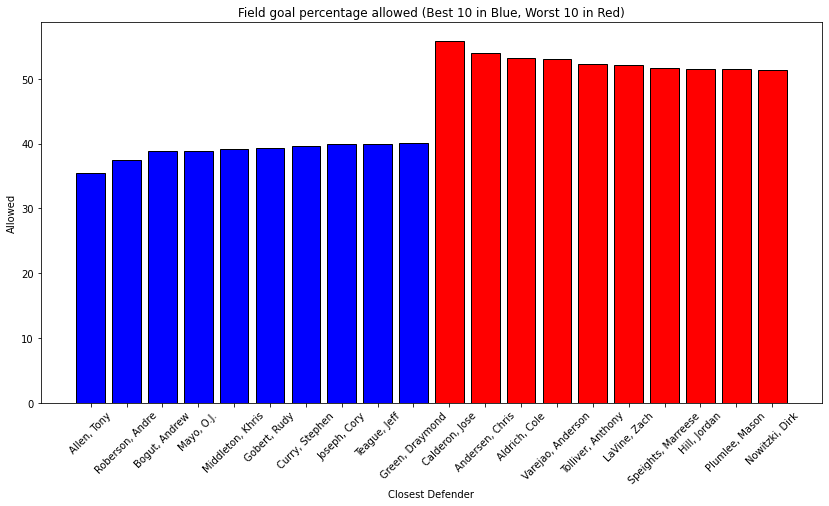

In [140]:
top_n = 10

combined_data_sorted_asc = combined_data.sort_values(by='allowed', ascending=True).head(top_n)
combined_data_sorted_desc = combined_data.sort_values(by='allowed', ascending=False).head(top_n)

# Concatenating the two dataframes
combined_data_sorted = pd.concat([combined_data_sorted_asc, combined_data_sorted_desc])

# Define colors: red for the first 15, blue for the next 15
colors = ['blue'] * top_n + ['red'] * top_n

# Plotting
plt.figure(figsize=(14, 7))

# Plot combined data with specified colors
plt.bar(combined_data_sorted['CLOSEST_DEFENDER'], combined_data_sorted['allowed'], color=colors, edgecolor='black')

# Setting labels and title
plt.xlabel('Closest Defender')
plt.ylabel('Allowed')
plt.title('Field goal percentage allowed (Best 10 in Blue, Worst 10 in Red)')
plt.xticks(rotation=45)

plt.show()

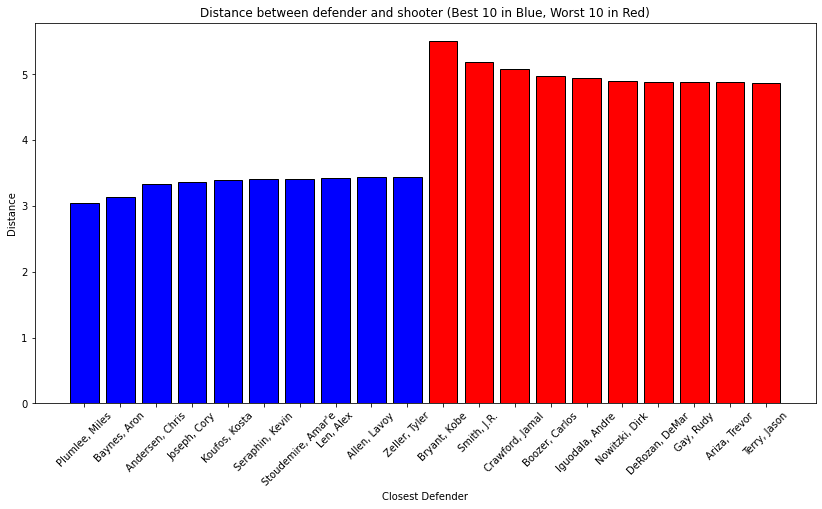

In [141]:
top_n = 10

combined_data_sorted_asc = combined_data.sort_values(by='CLOSE_DEF_DIST', ascending=True).head(top_n)
combined_data_sorted_desc = combined_data.sort_values(by='CLOSE_DEF_DIST', ascending=False).head(top_n)

# Concatenating the two dataframes
combined_data_sorted = pd.concat([combined_data_sorted_asc, combined_data_sorted_desc])

# Define colors: red for the first 15, blue for the next 15
colors = ['blue'] * top_n + ['red'] * top_n

# Plotting
plt.figure(figsize=(14, 7))

# Plot combined data with specified colors
plt.bar(combined_data_sorted['CLOSEST_DEFENDER'], combined_data_sorted['CLOSE_DEF_DIST'], color=colors, edgecolor='black')

# Setting labels and title
plt.xlabel('Closest Defender')
plt.ylabel('Distance')
plt.title('Distance between defender and shooter (Best 10 in Blue, Worst 10 in Red)')
plt.xticks(rotation=45)

plt.show()

In [142]:
correlation_def_dist = combined_data['CLOSE_DEF_DIST'].corr(combined_data['allowed'])

In [143]:
correlation_def_dist

-0.0346022384782548

### Now let's look at the relationship between the closest defender distance and shooting percentage

In [153]:
# player = 'Green, Draymond' # I've chosen Draymond since he was a key part of the Warriors' 2015 championship run

In [154]:
full_data = pd.read_csv('~/Downloads/shot_logs.csv')
full_data['SHOT_RESULT'] = full_data['SHOT_RESULT'].map({'made': 1, 'missed': 0})
# full_data = full_data[full_data['CLOSEST_DEFENDER'] == player]

In [155]:
full_data

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,0,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,1,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,1,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,0,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [156]:
scorers = returnGrouped(full_data, 'player_name')
scorers.sort_values(by='SHOT_RESULT', ascending=False)

,player_name,SHOT_NUMBER,PTS,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST
208,nikola vucevic,902,962,480,3.702772,9.473503
171,lebron james,978,1041,478,4.192843,14.010020
108,james harden,1054,1103,474,3.762334,14.850759
198,mnta ellis,1052,1018,473,4.297338,14.453327
167,lamarcus aldridge,1050,971,473,4.072190,13.616952
...,...,...,...,...,...,...
101,hedo turkoglu,102,119,45,5.242157,21.358824
129,joe harris,100,111,41,5.628000,19.634000
6,alan crabbe,94,102,40,5.855319,19.230851
195,mike miller,94,83,29,6.253191,23.515957


In [157]:
scorers['sp'] = scorers['SHOT_RESULT'] / scorers['SHOT_NUMBER'] * 100
scorers

,player_name,SHOT_NUMBER,PTS,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST,sp
0,aaron brooks,561,555,233,3.671836,15.088592,41.532977
1,aaron gordon,104,119,55,4.152885,10.062500,52.884615
2,al farouq aminu,258,248,111,4.972093,12.893411,43.023256
3,al horford,715,783,387,4.886154,11.973566,54.125874
4,al jefferson,800,766,382,3.029875,9.315375,47.750000
...,...,...,...,...,...,...,...
276,wesley matthews,748,845,336,4.870187,18.522193,44.919786
277,wilson chandler,733,714,304,4.066166,15.371214,41.473397
278,zach lavine,371,337,157,4.146631,14.776011,42.318059
279,zach randolph,671,661,328,2.952012,8.174516,48.882265


In [158]:
scorers = scorers[scorers['sp'] != 0]
scorers = returnSorted(scorers, 'PTS', False)

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scorers[['CLOSE_DEF_DIST_scaled', 'SHOT_DIST_scaled', 'sp_scaled']] = scaler.fit_transform(scorers[['CLOSE_DEF_DIST', 'SHOT_DIST', 'sp']])

scorers['combined'] = scorers['CLOSE_DEF_DIST_scaled'] + scorers['SHOT_DIST_scaled']

# Calculating correlation coefficient
correlation = scorers['SHOT_DIST'].corr(scorers['sp'])

In [165]:
correlation

-0.74195006686889

As expected, there is a fairly strong negative correlation between shot distance and shooting percentage i.e shots from closer to the basket are higher percentage shots than shots further from the basket

In [167]:
correlation_def_dist = scorers['CLOSE_DEF_DIST'].corr(scorers['sp'])
correlation_def_dist

-0.5590455119490659

Surprisingly, there is a negative correlation between the closest defender distance and the shooting percentage. Why is that?

Typically, shots from within the paint (i.e the higher percentage shots from earlier) are associated with a defender being close by because the paint is usually a crowded region of the floor.

Let's filter out shots from within the paint (assume shots within 5 feet are within the paint)
Similarly, shots from very far out (basically long range 3's, heaves at the end of quarters etc) are also not defended very tightly. Let's also filter those out and take a look at the correlation

In [184]:
full_data_outside = full_data[full_data['SHOT_DIST'] > 5]
full_data_outside = full_data_outside[full_data_outside['SHOT_DIST'] < 27]
outside_paint = returnGrouped(full_data_outside, 'player_name')
outside_paint

,player_name,SHOT_NUMBER,PTS,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST
0,aaron brooks,399,393,158,3.963659,16.946366
1,aaron gordon,64,61,26,5.434375,14.517188
2,al farouq aminu,160,116,45,5.995000,18.935000
3,al horford,528,507,249,5.586553,15.011742
4,al jefferson,615,522,260,3.315610,11.078211
...,...,...,...,...,...,...
276,wesley matthews,632,713,271,5.224209,20.839873
277,wilson chandler,567,519,208,4.481481,18.406878
278,zach lavine,263,208,93,4.628897,18.690114
279,zach randolph,349,280,139,3.718625,12.555301


In [185]:
outside_paint['sp'] = outside_paint['SHOT_RESULT'] / outside_paint['SHOT_NUMBER'] * 100

In [186]:
outside_paint

,player_name,SHOT_NUMBER,PTS,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST,sp
0,aaron brooks,399,393,158,3.963659,16.946366,39.598997
1,aaron gordon,64,61,26,5.434375,14.517188,40.625000
2,al farouq aminu,160,116,45,5.995000,18.935000,28.125000
3,al horford,528,507,249,5.586553,15.011742,47.159091
4,al jefferson,615,522,260,3.315610,11.078211,42.276423
...,...,...,...,...,...,...,...
276,wesley matthews,632,713,271,5.224209,20.839873,42.879747
277,wilson chandler,567,519,208,4.481481,18.406878,36.684303
278,zach lavine,263,208,93,4.628897,18.690114,35.361217
279,zach randolph,349,280,139,3.718625,12.555301,39.828080


In [187]:
correlation_def_dist = outside_paint['CLOSE_DEF_DIST'].corr(outside_paint['sp'])
correlation_def_dist

-0.20785026248446553

Now, you see a much weaker correlation between the closest defender distance and the shooting percentage.

#### Experimentation

In [201]:
full_data = pd.read_csv('~/Downloads/shot_logs.csv')

In [202]:
full_data['SHOT_RESULT'] = full_data['SHOT_RESULT'].map({'made': 1, 'missed': 0})

In [194]:
scorers = returnGrouped(full_data, 'player_name')
scorers.sort_values(by='SHOT_RESULT', ascending=False)


,player_name,SHOT_NUMBER,PTS,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST
208,nikola vucevic,902,962,480,3.702772,9.473503
171,lebron james,978,1041,478,4.192843,14.010020
108,james harden,1054,1103,474,3.762334,14.850759
198,mnta ellis,1052,1018,473,4.297338,14.453327
167,lamarcus aldridge,1050,971,473,4.072190,13.616952
...,...,...,...,...,...,...
101,hedo turkoglu,102,119,45,5.242157,21.358824
129,joe harris,100,111,41,5.628000,19.634000
6,alan crabbe,94,102,40,5.855319,19.230851
195,mike miller,94,83,29,6.253191,23.515957


In [195]:
scorers['combined'] = scorers['SHOT_DIST'] * scorers['CLOSE_DEF_DIST']

In [198]:
scorers['sp'] = scorers['SHOT_RESULT'] / scorers['SHOT_NUMBER'] * 100
scorers['combined'].corr(scorers['sp'])

-0.6718670955837428

In [200]:
full_data_outside = full_data[full_data['SHOT_DIST'] > 5]
full_data_outside = full_data_outside[full_data_outside['SHOT_DIST'] < 27]
outside_paint = returnGrouped(full_data_outside, 'player_name')
outside_paint['combined'] = outside_paint['SHOT_DIST'] * outside_paint['CLOSE_DEF_DIST']
outside_paint['sp'] = outside_paint['SHOT_RESULT'] / outside_paint['SHOT_NUMBER'] * 100
outside_paint['combined'].corr(outside_paint['sp'])

-0.2450614509961339